# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [ ]:
def apply_svd_custom(X_train, X_test, n_components):
  # Calculate the mean of the training data
  X_mean = np.mean(X_train, axis=0)

  # Center the training and test data
  X_train_centered = X_train - X_mean
  X_test_centered = X_test - X_mean

  # Calculate the covariance matrix
  covariance_matrix = np.cov(X_train_centered, rowvar=False)

  # Calculate eigenvalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

  # Sort eigenvalues and eigenvectors in descending order
  idx = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:, idx]

  # Select the top n_components eigenvectors
  U = eigenvectors[:, :n_components]

  # Project the training and test data onto the principal components
  X_train_svd = X_train_centered @ U
  X_test_svd = X_test_centered @ U

  return X_train_svd, X_test_svd

## Part 3: Train Logistic Regression and Measure Performance

In [ ]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [ ]:
svd_components = [10, 20, 50, 75, 100, 130, 150, 175, 200, 250]

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

    results.append([n_components, accuracy, training_time])

Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8035, Training time: 3.1039 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8784, Training time: 2.8771 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 14.2457 seconds
Applying custom SVD with 75 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 75, Accuracy: 0.9152, Training time: 26.7524 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 47.6275 seconds
Applying custom SVD with 130 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 130, Accuracy: 0.9199, Training time: 64.5109 seconds
Applying custom SVD with 150 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 150, Accuracy: 0.9197, Training time: 71.2521 seconds
Applying custom SVD with 175 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 175, Accuracy: 0.9211, Training time: 88.4148 seconds
Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 98.6512 seconds
Applying custom SVD with 250 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 250, Accuracy: 0.9211, Training time: 133.1887 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


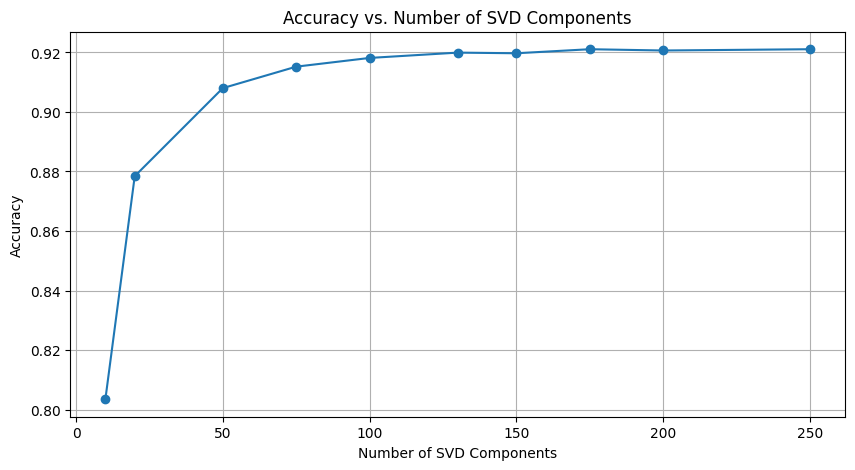

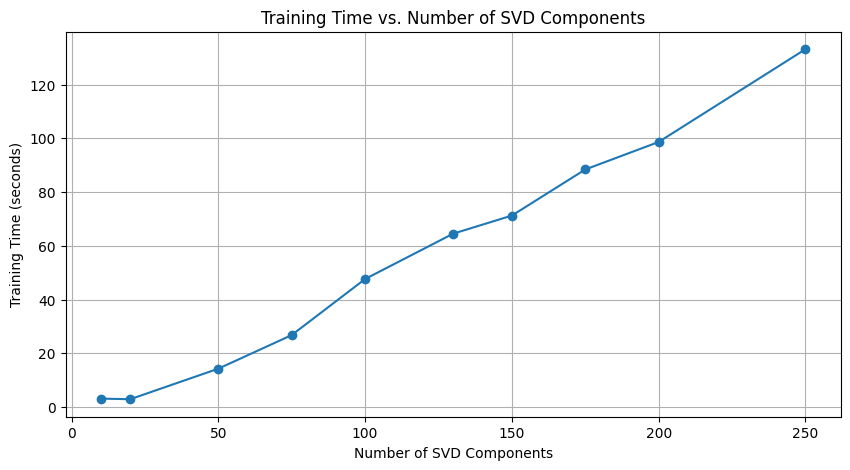

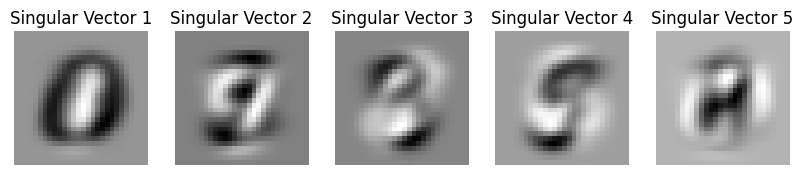

In [ ]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# Extract data from results
n_components = [result[0] for result in results]
accuracies = [result[1] for result in results]
training_times = [result[2] for result in results]

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(n_components, accuracies, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot training time
plt.figure(figsize=(10, 5))
plt.plot(n_components, training_times, marker='o')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.show()


# Calculate SVD for visualization
X_mean = np.mean(X_train, axis=0)
X_train_centered = X_train - X_mean
covariance_matrix = np.cov(X_train_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:,idx]

# Plot top 5 singular vectors
plt.figure(figsize=(10, 5))
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(eigenvectors[:, i].reshape(28, 28), cmap='gray')
  plt.title(f'Singular Vector {i+1}')
  plt.axis('off')
plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER:

Based on the visualizations and data gathered, here's what we can conclude off it. Accuracy increases with the number of SVD components. Initially, the increase is steep, but it plateaus around 100 components. This indicates that most of the important information is captured by the top 100 singular vectors. Using more components offers diminishing returns in accuracy. Moreoever, training time increases linearly with the number of SVD components. This is expected as higher dimensionality requires more computation. On the other hand, the top singular vectors represent the most dominant patterns in the data. Visualizing them as images shows that they capture general shapes and features of handwritten digits. Given he previous observations, it is accurate to say that there exists a trade-off between accuracy, training time, and the number of components. Increasing components improves accuracy but also increases training time. I can concude that around 100 components seems like the optimal for this dataset and model. It balances high accuracy with reasonable training time. Fially, SVD reduces dimensionality, leading to faster training and potentially improved model generalization by focusing on the most important data patterns. However, using too few components can lead to information loss and reduced accuracy.